In [122]:
# processing imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap


In [123]:
# the following is assuming that file cities.csv is already fixed for problems mentioned by Oleg
# correct file will be attached in the submission
cities = pd.read_csv('cities-new.csv')
cities.head()

,Индекс,Тип региона,Регион,Тип района,Район,Тип города,Город,Тип н/п,Н/п,Код КЛАДР,...,Уровень по ФИАС,Признак центра района или региона,Код ОКАТО,Код ОКТМО,Код ИФНС,Часовой пояс,Широта,Долгота,Федеральный округ,Население
0,385200.0,Респ,Адыгея,NaN,NaN,г,Адыгейск,NaN,NaN,100000200000,...,4: город,0,79403000000,7.970300e+10,107,UTC+3,44.878372,39.190172,Южный,12689
1,385000.0,Респ,Адыгея,NaN,NaN,г,Майкоп,NaN,NaN,100000100000,...,4: город,2,79401000000,7.970100e+10,105,UTC+3,44.609827,40.100653,Южный,144055
2,649000.0,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,NaN,NaN,400000100000,...,4: город,2,84401000000,8.470100e+07,400,UTC+7,51.958268,85.960296,Сибирский,62861
3,658125.0,край,Алтайский,NaN,NaN,г,Алейск,NaN,NaN,2200000200000,...,4: город,0,1403000000,1.703000e+06,2201,UTC+7,52.492091,82.779415,Сибирский,28528
4,656000.0,край,Алтайский,NaN,NaN,г,Барнаул,NaN,NaN,2200000100000,...,4: город,2,1401000000,1.701000e+06,2200,UTC+7,53.348115,83.779836,Сибирский,635585


In [124]:
# conda install -c conda-forge basemap=1.1.0=py36_4
# conda install pillow
# conda install -c conda-forge proj4

cities = cities.sort_values('Население', ascending=False).nlargest(30, 'Население')
required_columns = ['Индекс', 'Город', 'Широта', 'Долгота', 'Население']
cities = cities[required_columns]
cities

,Индекс,Город,Широта,Долгота,Население
506,101000.0,Москва,55.753879,37.620373,11514330
782,190000.0,Санкт-Петербург,59.939125,30.315822,4848742
643,630000.0,Новосибирск,55.028102,82.921057,1498921
828,620000.0,Екатеринбург,56.838633,60.605489,1377738
615,603000.0,Нижний Новгород,56.324209,44.005395,1250615
924,420000.0,Казань,55.794388,49.111531,1216965
778,443000.0,Самара,53.195166,50.106769,1164900
652,644000.0,Омск,54.984814,73.367464,1154000
1060,454000.0,Челябинск,55.160366,61.400786,1130273
753,344000.0,Ростов-на-Дону,47.222436,39.718787,1091544


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


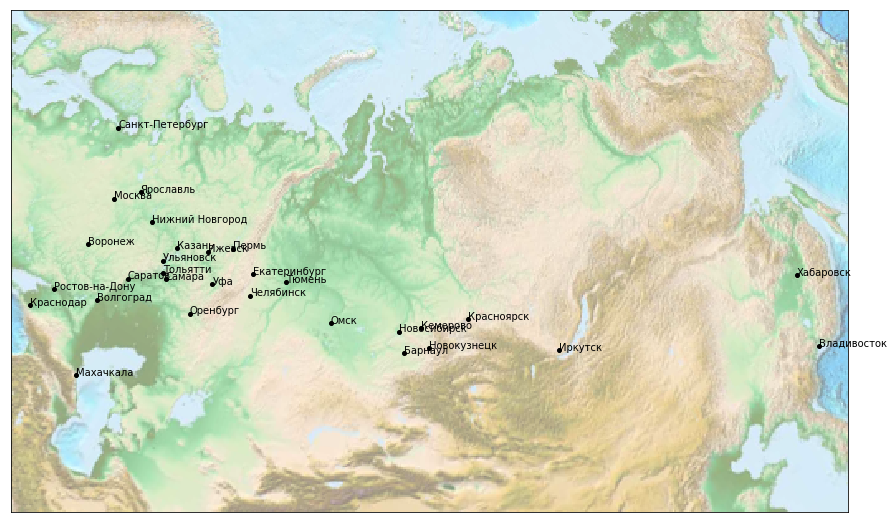

In [125]:
plt.figure(figsize=(15,15))
m = Basemap(projection='lcc', resolution=None,
            width=7.5E6, height=4.5E6, 
            lat_0=60.794276, lon_0=87.214405,)
m.etopo(scale=.5, alpha=.5)

for index, city in cities.iterrows():
    x, y = m(city['Долгота'], city['Широта'])
    plt.plot(x, y, 'ok', markersize=4)
    plt.text(x, y, city['Город'], fontsize=10)

In [126]:
# function which calculates the distance between two points on the globe
def haversine(city_0, city_1):
    lon_0, lat_0, lon_1, lat_1 = city_0['Долгота'], city_0['Широта'], city_1['Долгота'], city_1['Широта']
    lon_0, lat_0, lon_1, lat_1 = map(radians, [lon_0, lat_0, lon_1, lat_1])

    lon_dif = lon_1 - lon_0 
    lat_dif = lat_1 - lat_0 
    a = sin(lat_dif/2)**2 + cos(lat_0) * cos(lat_1) * sin(lon_dif/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 
    return c * r

In [127]:
# absolute distance between Moscow and Saint-Petersburg
haversine(cities.iloc[0], cities.iloc[1])

634.4525683994508

In [128]:
def total_distance(route):
    total_distance = 0
    for i in range(len(route)):
        city_0 = route[i]
        if (i + 1 < len(route)):
            city_1 = route[i + 1]
        else:
            city_1 = route[0]
        total_distance += haversine(cities.iloc[city_0], cities.iloc[city_1])
    return total_distance

def acceptance_probability(current_distance, new_distance, t):
    if new_distance < current_distance:
        return 1.0
    return math.exp((current_distance - new_distance) / t);

def anneal(t, cooling_rate):
    step, distances, temperatures, steps = 0, [], [], []
    random.seed(0)
    current_route = random.permutation([i for i in range(30)])
    best_route = current_route.copy()
    
    while t > 1:
        new_route = current_route.copy()
        
        position_0 = random.randint(0, len(new_route) - 1)
        position_1 = random.randint(0, len(new_route) - 1)
        city_0 = new_route[position_0]
        city_1 = new_route[position_1]
        new_route[position_1] = city_0
        new_route[position_0] = city_1
        
        current_distance = total_distance(current_route)
        new_distance = total_distance(new_route)
        
        if acceptance_probability(current_distance, new_distance, t) > random.random():
            current_route = new_route.copy()
        
        if total_distance(current_route) < total_distance(best_route):
            best_route = current_route.copy()
        
        if step % 100 == 0:
            print(f'Iteration: {step}, temperature: {t}, distance {total_distance(current_route)}')
        
        distances.append(total_distance(current_route))
        temperatures.append(t)
        steps.append(step)
        
        t *= 1 - cooling_rate
        step += 1
        
    print(f'Best distance is {total_distance(best_route)}')
    
    return distances, temperatures, steps, best_route

In [129]:
def plot_route(best_route):
    plt.figure(figsize=(15,15))
    m = Basemap(projection='lcc', resolution=None,
                width=7.5E6, height=4.5E6, 
                lat_0=60.794276, lon_0=87.214405,)
    m.etopo(scale=.5, alpha=.5)

    for index, value in enumerate(best_route):
        x_0, y_0 = m(cities.iloc[value]['Долгота'], cities.iloc[value]['Широта'])
        if index + 1 != len(best_route):
            x_1, y_1 = m(cities.iloc[best_route[index + 1]]['Долгота'], cities.iloc[best_route[index + 1]]['Широта'])
        else:
            x_1, y_1 = m(cities.iloc[best_route[0]]['Долгота'], cities.iloc[best_route[0]]['Широта'])
        if index == 0:
            plt.plot(x_0, y_0, 'ro', markersize=5)
            plt.text(x_0, y_0, cities.iloc[value]['Город'], fontsize=10, color='red')
        else:
            plt.plot(x_0, y_0, 'ok', markersize=4)
            plt.text(x_0, y_0, cities.iloc[value]['Город'], fontsize=10)
        plt.plot([x_0, x_1], [y_0, y_1], color='black', alpha=.5)
        
def show_graph(steps, distances):
    fig, ax = subplots(figsize=(12, 7))
    ax.plot(steps, distances)
    ax.set_xlabel('Steps')
    ax.set_ylabel('Route distance')
    show()

In [130]:
# Average cooling
distances, temperatures, steps, best_route = anneal(10000, 0.003)

Iteration: 0, temperature: 10000, distance 65749.44573139086
Iteration: 100, temperature: 7404.842595397826, distance 65202.062528816605
Iteration: 200, temperature: 5483.169386261803, distance 50874.71983308549
Iteration: 300, temperature: 4060.2006229172807, distance 56624.214885142894
Iteration: 400, temperature: 3006.5146518438683, distance 65297.87434668672
Iteration: 500, temperature: 2226.276775766115, distance 52547.948347608835
Iteration: 600, temperature: 1648.522909833786, distance 51013.987636202386
Iteration: 700, temperature: 1220.7052662226392, distance 38992.19366281701
Iteration: 800, temperature: 903.9130351751851, distance 36540.526222002474
Iteration: 900, temperature: 669.3333745400539, distance 39988.62005919225
Iteration: 1000, temperature: 495.6308282315561, distance 38054.056334319066
Iteration: 1100, temperature: 367.00682684813296, distance 32196.583976682832
Iteration: 1200, temperature: 271.762778424685, distance 31253.95530905232
Iteration: 1300, temperatu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


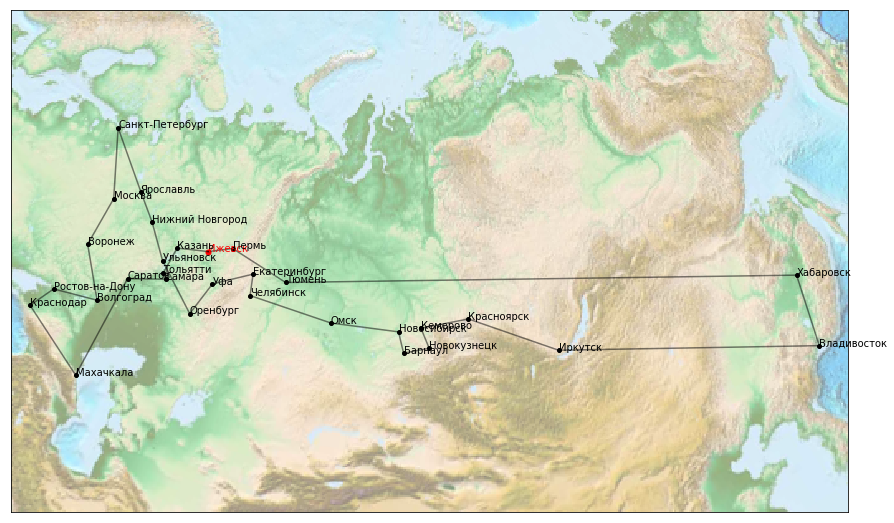

In [131]:
plot_route(best_route)

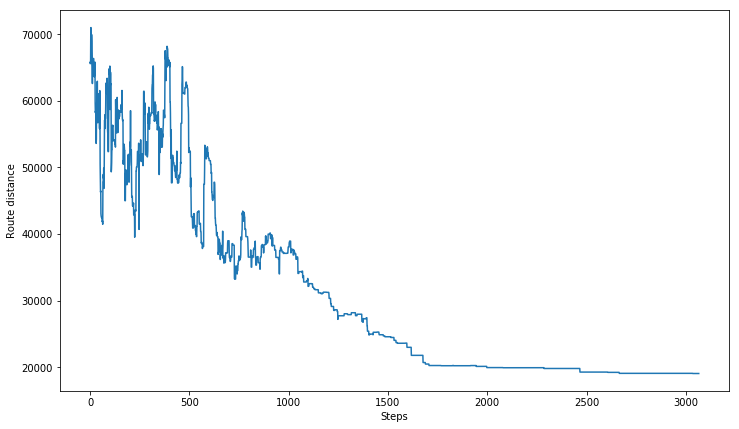

In [132]:
show_graph(steps, distances)

In [133]:
# Average cooling
distances, temperatures, steps, best_route = anneal(10000, 0.01)

Iteration: 0, temperature: 10000, distance 65749.44573139086
Iteration: 100, temperature: 3660.323412732294, distance 48261.86303713727
Iteration: 200, temperature: 1339.7967485796175, distance 37670.228229443615
Iteration: 300, temperature: 490.40894071285766, distance 36478.46278745218
Iteration: 400, temperature: 179.50553275045147, distance 31406.437918637952
Iteration: 500, temperature: 65.70483042414611, distance 29312.821538934426
Iteration: 600, temperature: 24.050092913110706, distance 26370.965730984142
Iteration: 700, temperature: 8.80311181682461, distance 25856.505410860344
Iteration: 800, temperature: 3.222223628802343, distance 25686.730073251194
Iteration: 900, temperature: 1.1794380589564424, distance 24765.88807089445
Best distance is 24457.488882635284


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


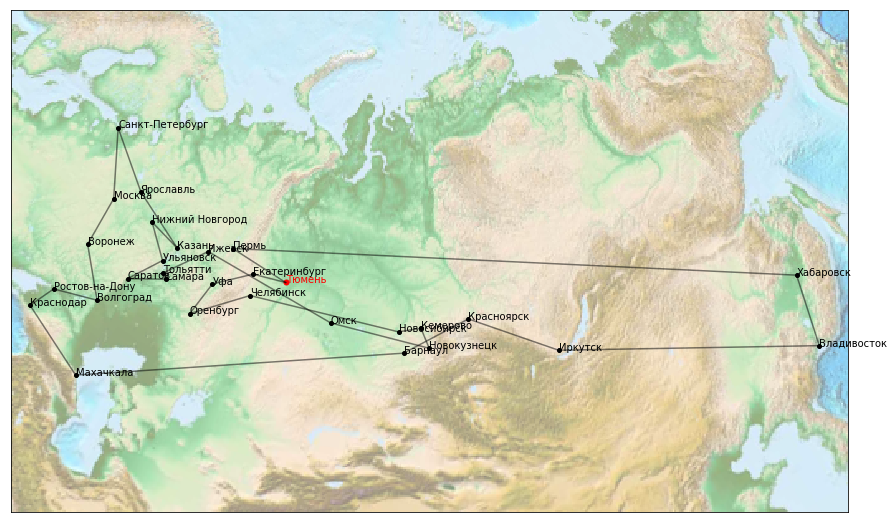

In [134]:
plot_route(best_route)

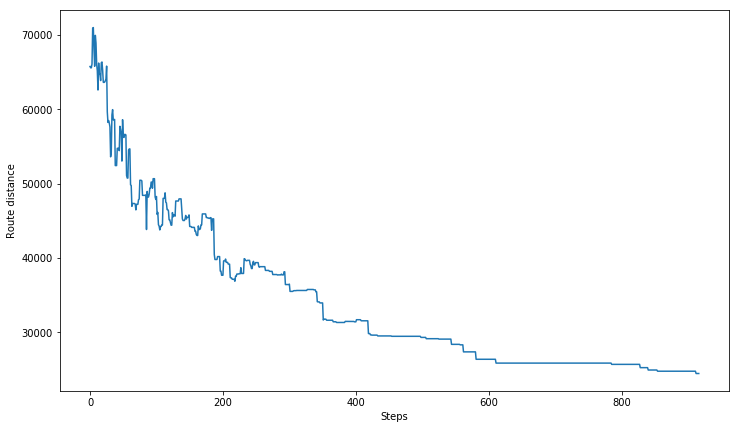

In [135]:
show_graph(steps, distances)

In [136]:
# Fast cooling
distances, temperatures, steps, best_route = anneal(10000, 0.1)

Iteration: 0, temperature: 10000, distance 65749.44573139086
Best distance is 37499.9020774745


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


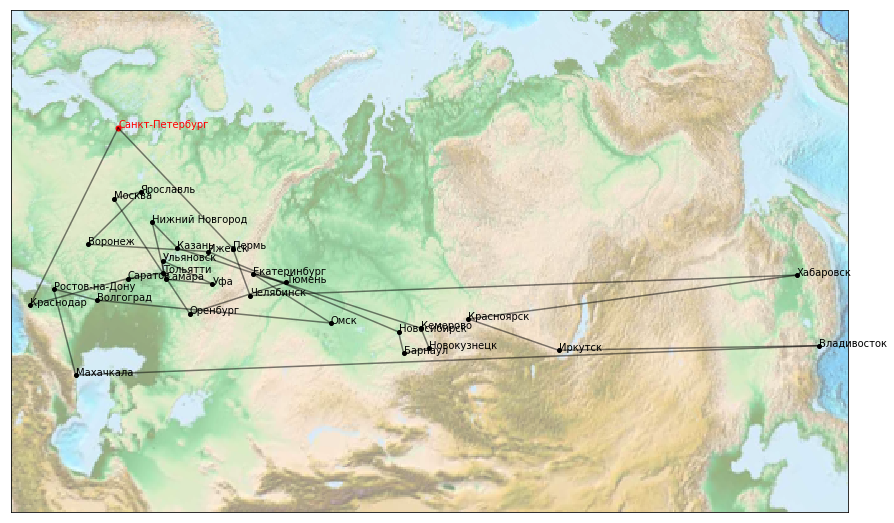

In [137]:
plot_route(best_route)

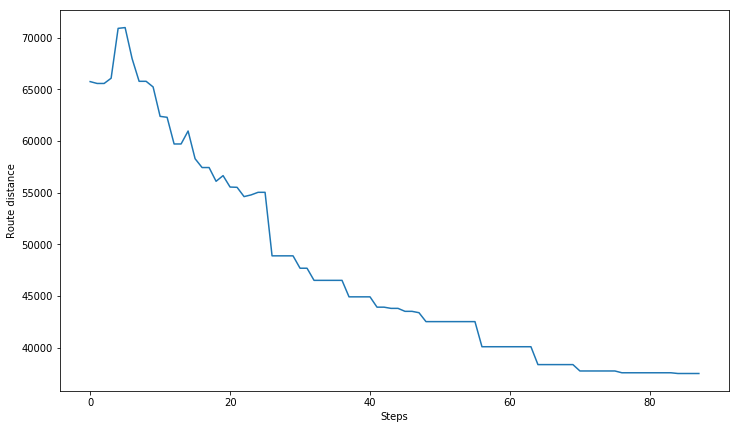

In [138]:
show_graph(steps, distances)